# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Important Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, titled "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State," contains data supporting the publication by Lee, Matthews, et al. (2025). The research investigates the role of dopamine projections from the dorsal raphe nucleus (DRN) in loneliness-like states. The dataset includes in vivo calcium imaging data, supporting behavioral videos, and ex vivo patch-clamp electrophysiology recordings from mice.

You can find more information about the Dandiset and access the data at its DANDI Archive page:
[https://dandiarchive.org/dandiset/001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)

## What this notebook covers

This notebook will guide you through:
1. Listing required Python packages.
2. Loading the Dandiset metadata and listing some of its assets using the DANDI API.
3. Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
4. Exploring the basic structure and metadata of the NWB file.
5. Visualizing some of the electrophysiology data (current clamp recordings) contained within the NWB file.
6. Summarizing findings and suggesting potential next steps for analysis.

## Required Packages

To run this notebook, you will need the following Python packages installed:

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for working with NWB files)
* `h5py` (a dependency for `pynwb` to handle HDF5 files)
* `remfile` (for accessing remote HDF5 files)
* `numpy` (for numerical operations)
* `matplotlib` (for plotting)
* `seaborn` (for enhanced visualizations)

It is assumed that these packages are already installed in your Python environment.

In [1]:
# Import necessary packages
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a nice plotting style
sns.set_theme()

## Loading the Dandiset using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001195"
dandiset_version = "0.250408.1733"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'No description provided.')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Corrected to use asset.identifier

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Dandiset description: Supporting data for the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Wasserlein, Matilde Borio, Raymundo L. Miranda, Laurel R. Keyes, Gates P. Schneider, Caroline Jia, Andrea Tran, Faith Aloboudi, May G. Chan, Enzo Peroni, Grace S. Pereira, Alba López-Moraga, Anna Pallé, Eyal Y. Kimchi, Nancy Padilla-Coreano, Romy Wichmann, Kay M. Tye.  bioRxiv 2025.02.03.636224; doi: https://doi.org/10.1101/2025.02.03.636224.  
This dataset includes both in vivo calcium imaging data with supporting behavioral videos and ex vivo patch-clamp electrophysiology recordings.

Ephys Patching data also used in earlier pre-print under the title: "Separable Dorsal Raphe Dopamine Projecti

## Loading an NWB file from the Dandiset

We will now load one of the NWB files from this Dandiset. NWB is a data standard for neurophysiology data, designed to facilitate data sharing and standardization.

The file we will load is `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`.
The asset ID for this file is `a243dde4-c270-42a9-8550-025f5ffcd5a7`.

The direct download URL for this asset is:
`https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/`

In [3]:
# Load the specific NWB file
nwb_asset_id = "a243dde4-c270-42a9-8550-025f5ffcd5a7"
nwb_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
print(f"Loading NWB file from: {nwb_url}")

remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file, 'r') # Ensure read mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read mode
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Experimenter(s): {nwbfile.experimenter}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/



NWB file loaded successfully.
Identifier: a18b081c-3b63-45df-b702-fc3640aef3de
Session description: episodic stimulation
Session start time: 2015-03-24 13:41:14-07:00
Experimenter(s): ('Matthews, Gillian',)


You can also explore this NWB file interactively using Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/&dandisetId=001195&dandisetVersion=draft)

## Exploring the NWB File Contents

Let's look at some of the metadata and data available in this NWB file.
This NWB file contains intracellular electrophysiology data, likely from patch-clamp recordings.
The data is typically stored in `acquisition` or `stimulus` groups.

### General Information

In [4]:
print(f"NWBFile Identifier: {nwbfile.identifier}")
print(f"Session Description: {nwbfile.session_description}")
print(f"Session Start Time: {nwbfile.session_start_time}")
print(f"Experimenter(s): {', '.join(nwbfile.experimenter) if nwbfile.experimenter else 'N/A'}")
if nwbfile.subject:
    print(f"Subject ID: {nwbfile.subject.subject_id}")
    print(f"Subject Species: {nwbfile.subject.species}")
    print(f"Subject Sex: {nwbfile.subject.sex}")
    print(f"Subject Age: {nwbfile.subject.age}")
print(f"Lab: {nwbfile.lab}")
print(f"Institution: {nwbfile.institution}")

NWBFile Identifier: a18b081c-3b63-45df-b702-fc3640aef3de
Session Description: episodic stimulation
Session Start Time: 2015-03-24 13:41:14-07:00
Experimenter(s): Matthews, Gillian
Subject ID: 23
Subject Species: Mus musculus
Subject Sex: F
Subject Age: P302D
Lab: Kay Tye Lab
Institution: Massachusetts Institute of Technology


### Acquisition Data
The `acquisition` group contains data acquired during the experiment. Let's list the time series objects available.

In [5]:
print("Available data series in acquisition:")
if nwbfile.acquisition:
    for series_name, series_obj in nwbfile.acquisition.items():
        print(f"- {series_name} (type: {type(series_obj).__name__})")
else:
    print("No data series found in nwbfile.acquisition.")

Available data series in acquisition:
- current_clamp-response-01-ch-0 (type: CurrentClampSeries)
- current_clamp-response-01-ch-1 (type: CurrentClampSeries)
- current_clamp-response-02-ch-0 (type: CurrentClampSeries)
- current_clamp-response-02-ch-1 (type: CurrentClampSeries)
- current_clamp-response-03-ch-0 (type: CurrentClampSeries)
- current_clamp-response-03-ch-1 (type: CurrentClampSeries)
- current_clamp-response-04-ch-0 (type: CurrentClampSeries)
- current_clamp-response-04-ch-1 (type: CurrentClampSeries)
- current_clamp-response-05-ch-0 (type: CurrentClampSeries)
- current_clamp-response-05-ch-1 (type: CurrentClampSeries)
- current_clamp-response-06-ch-0 (type: CurrentClampSeries)
- current_clamp-response-06-ch-1 (type: CurrentClampSeries)
- current_clamp-response-07-ch-0 (type: CurrentClampSeries)
- current_clamp-response-07-ch-1 (type: CurrentClampSeries)
- current_clamp-response-08-ch-0 (type: CurrentClampSeries)
- current_clamp-response-08-ch-1 (type: CurrentClampSeries)
- 

### Stimulus Data
The `stimulus` group contains information about stimuli presented during the experiment.

In [6]:
print("\nAvailable stimulus series in stimulus:")
if nwbfile.stimulus:
    for series_name, series_obj in nwbfile.stimulus.items():
        print(f"- {series_name} (type: {type(series_obj).__name__})")
else:
    print("No stimulus series found in nwbfile.stimulus.")


Available stimulus series in stimulus:
- stimulus-01-ch-0 (type: CurrentClampStimulusSeries)
- stimulus-01-ch-1 (type: CurrentClampStimulusSeries)
- stimulus-02-ch-0 (type: CurrentClampStimulusSeries)
- stimulus-02-ch-1 (type: CurrentClampStimulusSeries)
- stimulus-03-ch-0 (type: CurrentClampStimulusSeries)
- stimulus-03-ch-1 (type: CurrentClampStimulusSeries)
- stimulus-04-ch-0 (type: CurrentClampStimulusSeries)
- stimulus-04-ch-1 (type: CurrentClampStimulusSeries)
- stimulus-05-ch-0 (type: CurrentClampStimulusSeries)
- stimulus-05-ch-1 (type: CurrentClampStimulusSeries)
- stimulus-06-ch-0 (type: CurrentClampStimulusSeries)
- stimulus-06-ch-1 (type: CurrentClampStimulusSeries)
- stimulus-07-ch-0 (type: CurrentClampStimulusSeries)
- stimulus-07-ch-1 (type: CurrentClampStimulusSeries)
- stimulus-08-ch-0 (type: CurrentClampStimulusSeries)
- stimulus-08-ch-1 (type: CurrentClampStimulusSeries)
- stimulus-09-ch-0 (type: CurrentClampStimulusSeries)
- stimulus-09-ch-1 (type: CurrentClampStim

### Intracellular Recording Tables
NWB files often use tables to organize intracellular recording metadata. Let's check for these tables.
For example, `icephys_sequential_recordings` describes sequences of recordings.

In [7]:
if nwbfile.icephys_sequential_recordings:
    print("\nIcephys Sequential Recordings Table:")
    # Displaying the table directly can be verbose. Let's show its structure.
    print(f"  Description: {nwbfile.icephys_sequential_recordings.description}")
    print(f"  Columns: {nwbfile.icephys_sequential_recordings.colnames}")
    # For a cleaner look, we can convert to a pandas DataFrame if pandas is available,
    # but for now, let's just show a summary.
    # To see the full table: nwbfile.icephys_sequential_recordings.to_dataframe()
    df_seq_rec = nwbfile.icephys_sequential_recordings.to_dataframe()
    print("First 5 rows of Sequential Recordings Table:")
    print(df_seq_rec.head())

    if 'stimulus_type' in df_seq_rec.columns:
        print("\nStimulus types found in Sequential Recordings:")
        print(df_seq_rec['stimulus_type'].unique())
else:
    print("\nNo icephys_sequential_recordings table found.")


Icephys Sequential Recordings Table:
  Description: A table for grouping different intracellular recording simultaneous_recordings from the SimultaneousRecordingsTable table together. This is typically used to group together simultaneous_recordings where the a sequence of stimuli of the same type with varying parameters have been presented in a sequence.
  Columns: ('simultaneous_recordings', 'stimulus_type')
First 5 rows of Sequential Recordings Table:
                              simultaneous_recordings  \
id                                                      
0                                              rec...   
1                                              rec...   
2                                              rec...   
3                                              rec...   
4                                              rec...   

                                        stimulus_type  
id                                                     
0   episodic stimulation, 1s 

## Visualizing Current Clamp Data

Let's select one of the `CurrentClampSeries` from the `acquisition` data and plot it.
We'll choose `current_clamp-response-01-ch-0` as an example.
These series typically represent voltage responses to current injections.
To keep the plot manageable and reduce data loading, we will plot only a subset of the data, for example, the first 1000 data points.


Plotting data from: current_clamp-response-01-ch-0 and stimulus-01-ch-0
Response Series Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
Stimulus Series Description: Stim type: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA


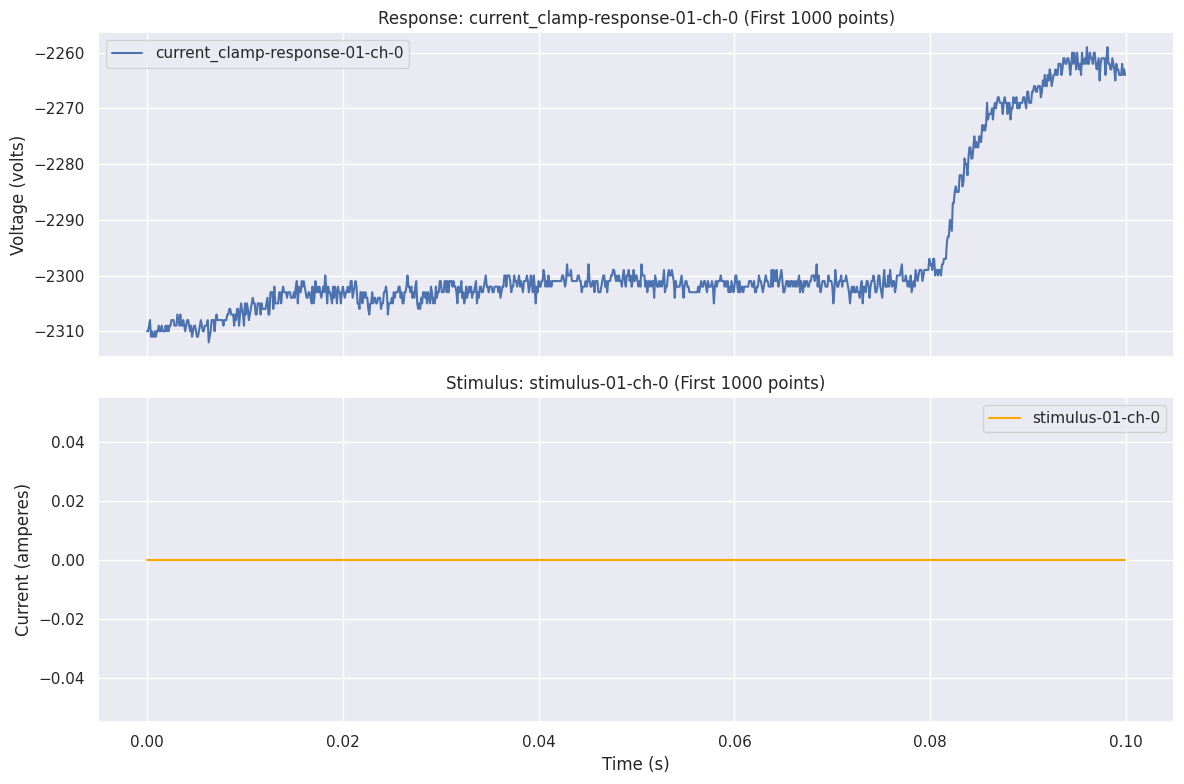

In [8]:
trace_name_response = "current_clamp-response-01-ch-0"
trace_name_stimulus = "stimulus-01-ch-0" # Corresponding stimulus

if nwbfile.acquisition and trace_name_response in nwbfile.acquisition and \
   nwbfile.stimulus and trace_name_stimulus in nwbfile.stimulus:

    response_series = nwbfile.acquisition[trace_name_response]
    stimulus_series = nwbfile.stimulus[trace_name_stimulus]

    print(f"\nPlotting data from: {trace_name_response} and {trace_name_stimulus}")
    print(f"Response Series Description: {response_series.description}")
    print(f"Stimulus Series Description: {stimulus_series.description}")

    # Load a subset of data to avoid excessive loading times
    num_points_to_plot = 1000
    response_data = response_series.data[:num_points_to_plot]
    stimulus_data = stimulus_series.data[:num_points_to_plot]

    # Time vector
    sampling_rate = response_series.rate  # Hz
    time_vector = np.arange(num_points_to_plot) / sampling_rate # in seconds

    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot response
    axs[0].plot(time_vector, response_data, label=trace_name_response)
    axs[0].set_title(f'Response: {trace_name_response} (First {num_points_to_plot} points)')
    axs[0].set_ylabel(f'Voltage ({response_series.unit})')
    axs[0].legend()
    axs[0].grid(True)

    # Plot stimulus
    axs[1].plot(time_vector, stimulus_data, label=trace_name_stimulus, color='orange')
    axs[1].set_title(f'Stimulus: {trace_name_stimulus} (First {num_points_to_plot} points)')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel(f'Current ({stimulus_series.unit})')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

else:
    print(f"\nCould not find {trace_name_response} in acquisition or {trace_name_stimulus} in stimulus.")
    if not nwbfile.acquisition:
        print("nwbfile.acquisition is empty or None.")
    elif trace_name_response not in nwbfile.acquisition:
        print(f"{trace_name_response} not found. Available: {list(nwbfile.acquisition.keys())}")

    if not nwbfile.stimulus:
        print("nwbfile.stimulus is empty or None.")
    elif trace_name_stimulus not in nwbfile.stimulus:
        print(f"{trace_name_stimulus} not found. Available: {list(nwbfile.stimulus.keys())}")

The plot above shows the recorded membrane voltage (top panel) in response to a current injection (bottom panel) for the selected series. This is a typical representation of a current clamp experiment step. Examining these traces can help understand the neuron's basic electrophysiological properties, such as its response to depolarizing or hyperpolarizing currents.

## Analyzing Multiple Current Clamp Sweeps

The `icephys_sequential_recordings` table suggests that this file contains data from "episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA". This usually means a series of current injections of increasing amplitude were applied. Let's try to plot a few of these sweeps on top of each other.

We will look for `CurrentClampSeries` in the acquisition that follow a pattern like `current_clamp-response-XX-ch-0`.

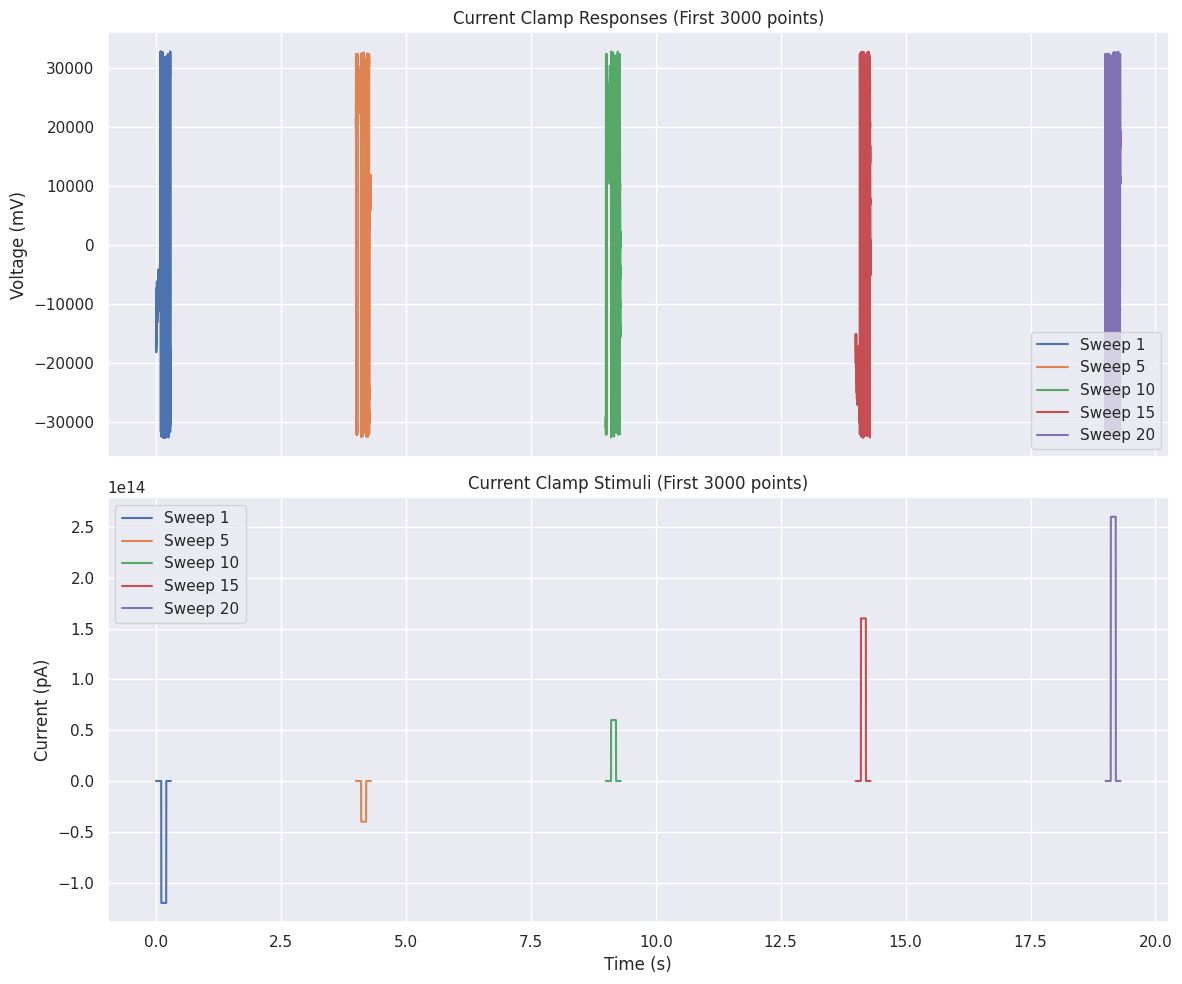

In [9]:
if nwbfile.acquisition and nwbfile.stimulus:
    sweep_response_traces = []
    sweep_stimulus_traces = []
    sweep_labels = []

    # Let's select a few sweeps to plot, e.g., sweeps 1, 5, 10, 15
    # The NWB file seems to have sweeps named like "current_clamp-response-01-ch-0", ..., "current_clamp-response-21-ch-0"
    # and "stimulus-01-ch-0", ...
    selected_sweep_indices = [1, 5, 10, 15, 20] # Using 1-based indexing for sweep numbers mentioned in descriptions

    for i in selected_sweep_indices:
        resp_trace_name = f"current_clamp-response-{i:02d}-ch-0"
        stim_trace_name = f"stimulus-{i:02d}-ch-0"
        if resp_trace_name in nwbfile.acquisition and stim_trace_name in nwbfile.stimulus:
            sweep_response_traces.append(nwbfile.acquisition[resp_trace_name])
            sweep_stimulus_traces.append(nwbfile.stimulus[stim_trace_name])
            sweep_labels.append(f"Sweep {i}")
        else:
            print(f"Could not find {resp_trace_name} or {stim_trace_name}. Skipping.")

    if sweep_response_traces:
        num_points_to_plot_multi = 3000 # Each sweep seems to be 3000 points (0.3s at 10kHz) based on nwb-file-info
                                        # tools_cli.py indicates data shape (3000,) so these are short sweeps
        
        fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
        
        # Response plot
        axs[0].set_title(f'Current Clamp Responses (First {num_points_to_plot_multi} points)')
        axs[0].set_ylabel('Voltage (mV)') # Assuming Volts, then converting to mV for typical display
        
        # Stimulus plot
        axs[1].set_title(f'Current Clamp Stimuli (First {num_points_to_plot_multi} points)')
        axs[1].set_xlabel('Time (s)')
        axs[1].set_ylabel('Current (pA)') # Assuming Amperes, then converting to pA

        for i, (resp_series, stim_series) in enumerate(zip(sweep_response_traces, sweep_stimulus_traces)):
            resp_data = resp_series.data[:num_points_to_plot_multi]
            stim_data = stim_series.data[:num_points_to_plot_multi]
            
            # Time vector (assuming all have same rate and starting time for this example plot)
            # Note: real starting times might differ, check resp_series.starting_time
            sampling_rate = resp_series.rate
            time_vector = (np.arange(num_points_to_plot_multi) / sampling_rate) + resp_series.starting_time

            # Plot response data (converting to mV if original is V)
            conversion_factor_resp = 1000 if resp_series.unit == 'volts' else 1
            axs[0].plot(time_vector, resp_data * conversion_factor_resp, label=sweep_labels[i])
            
            # Plot stimulus data (converting to pA if original is A)
            conversion_factor_stim = 1e12 if stim_series.unit == 'amperes' else 1
            axs[1].plot(time_vector, stim_data * conversion_factor_stim, label=sweep_labels[i])

        if sweep_response_traces[0].unit == 'volts':
             axs[0].set_ylabel('Voltage (mV)')
        else:
             axs[0].set_ylabel(f'Voltage ({sweep_response_traces[0].unit})')

        if sweep_stimulus_traces[0].unit == 'amperes':
             axs[1].set_ylabel('Current (pA)')
        else:
            axs[1].set_ylabel(f'Current ({sweep_stimulus_traces[0].unit})')

        axs[0].legend()
        axs[0].grid(True)
        axs[1].legend()
        axs[1].grid(True)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No suitable sweeps found for multi-sweep plot.")

else:
    print("NWB file acquisition or stimulus groups not found or are empty.")

This plot overlays several voltage responses to different current injection steps. You can see how the neuron's firing pattern changes with increasing current. This type of visualization is fundamental for characterizing the passive and active properties of a neuron, such as its input resistance, firing threshold, and action potential shape.

## Summary and Future Directions

This notebook demonstrated how to:
- Access and get metadata for Dandiset 001195.
- Load a specific NWB file containing intracellular electrophysiology data.
- Inspect basic metadata and content structure of the NWB file.
- Visualize current clamp recordings, showing both single sweeps and multiple overlaid sweeps.

### Possible Future Directions:

1.  **Detailed Electrophysiological Analysis**:
    *   Extract and analyze action potential features (e.g., threshold, amplitude, width).
    *   Calculate input resistance, membrane time constant from subthreshold responses.
    *   Plot I-V (current-voltage) curves and F-I (firing rate-current) curves.
2.  **Explore Other Data Types**:
    *   This Dandiset also contains calcium imaging and behavioral video data. Similar notebooks could be created to explore those data modalities.
    *   The selected NWB file also contains `VoltageClampSeries`. These could be analyzed to study synaptic currents or channel properties.
3.  **Batch Processing**:
    *   Iterate through multiple NWB files in the Dandiset to perform comparative analyses across different cells, subjects, or experimental conditions.
4.  **Integration with other tools**:
    *   Use libraries like `spikeinterface` or custom analysis scripts for more in-depth spike analysis if spike times are available or can be reliably detected (though spike detection is computationally intensive and might be better done outside a notebook for raw ephys).

This notebook provides a starting point. The richness of the NWB format and the DANDI archive allows for many more complex and interesting analyses.

Remember to consult the NWB documentation and the specific metadata of each file for detailed information about the data structures and experimental paradigms.

In [10]:
# It's good practice to close the NWB HDF5IO object, though not strictly enforced by pynwb itself for read operations
# and often omitted in example notebooks.
if 'io' in locals() and io:
    try:
        io.close()
        print("\nNWB IO object closed.")
    except Exception as e:
        print(f"Error closing NWB IO object: {e}")

if 'h5_file' in locals() and h5_file:
    try:
        h5_file.close()
        print("HDF5 file object closed.")
    except Exception as e:
        print(f"Error closing HDF5 file: {e}")

if 'remote_file' in locals() and remote_file:
    try:
        remote_file.close()
        print("Remote file object closed.")
    except Exception as e:
        print(f"Error closing remote file: {e}")


NWB IO object closed.
Remote file object closed.
